# Lectura y muestra del dataset

Lectura del archivo y visualización de registros

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../Datos/data.csv')
print(df.head())

      region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
1  Australia  Historical  EV stock share  Cars         EV  2011   percent   
2  Australia  Historical  EV sales share  Cars         EV  2011   percent   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0   49.00000  
1    0.00039  
2    0.00650  
3   49.00000  
4  220.00000  


# Procesamiento de datos

Acá se hace uso de la función to_dict para almacenar en una lista llamada ventas todos los registros o filas de la tabla en forma de diccionario.

In [48]:
ventas = df.to_dict(orient='records')
print(ventas[0])

{'region': 'Australia', 'category': 'Historical', 'parameter': 'EV sales', 'mode': 'Cars', 'powertrain': 'BEV', 'year': 2011, 'unit': 'Vehicles', 'value': 49.0}


## Funciones para estructuración de los datos

Primero filtramos las filas donde el parametro sea EV sales y la unidad sea Vehicles para así representar la venta de vehículos electricos.

In [49]:
ventas_filtradas = []
for fila in ventas:
    if fila['parameter'] == 'EV sales' and fila['unit'] == 'Vehicles':
        ventas_filtradas.append(fila)

### Total de ventas

In [50]:
def total_ventas(ventas):
    total = 0
    for fila in ventas:
        if 'value' in fila:
            total += fila['value']
    return total

### Ventas totales por año

In [51]:
def ventas_por_anio(ventas):
    ventas_anio = {}
    for fila in ventas:
        anio = fila['year']
        venta = fila['value']
        if anio not in ventas_anio:
            ventas_anio[anio] = 0
        ventas_anio[anio] += venta
    return ventas_anio


### Ventas por país

In [62]:
def ventas_por_pais(ventas):
    ventas_pais = {}
    for fila in ventas:
        pais = fila['region']
        venta = fila['value']
        if pais not in ventas_pais:
            ventas_pais[pais] = 0
        ventas_pais[pais] += venta
    return ventas_pais

### Top países con más ventas

In [63]:
def top_paises(ventas, top_n=5):
    ventas_pais = ventas_por_pais(ventas)
    
    items = []
    for pais in ventas_pais:
        items.append((pais, ventas_pais[pais]))

    def clave_venta(item):
        return item[1]
    
    items.sort(key=clave_venta, reverse=True)
    
    resultado = []
    for i in range(min(top_n, len(items))):
        resultado.append(items[i])
    return resultado

### Ventas promedio por powertrain

In [54]:
def ventas_promedio_por_powertrain(ventas):
    suma_ventas = {}
    cuenta = {}
    for fila in ventas:
        pt = fila['powertrain']
        venta = fila['value']
        if pt not in suma_ventas:
            suma_ventas[pt] = 0
            cuenta[pt] = 0
        suma_ventas[pt] += venta
        cuenta[pt] += 1

    promedio = {}
    for pt in suma_ventas:
        if cuenta[pt] > 0:
            promedio[pt] = suma_ventas[pt] / cuenta[pt]
        else:
            promedio[pt] = 0
    return promedio

### Ventas totales por año en Colombia

In [55]:
def ventas_por_ano_colombia(ventas):
    ventas_anio = {}
    for fila in ventas:
        if fila['region'] == 'Colombia' and fila['parameter'] == 'EV sales' and fila['unit'] == 'Vehicles':
            anio = fila['year']
            venta = fila['value']
            if anio not in ventas_anio:
                ventas_anio[anio] = 0
            ventas_anio[anio] += venta
    resultado = []
    for anio in ventas_anio:
        resultado.append({'año': anio, 'ventas': ventas_anio[anio]})
    return resultado

# Muestra de resultados

A continuación se mostrara el resultado de las operaciones realizadas

In [64]:
print("Total ventas mundial:", total_ventas(ventas_filtradas))
print("Ventas por año:", ventas_por_anio(ventas_filtradas))
print("Ventas por país:", ventas_por_pais(ventas_filtradas))
print("Top 5 países con más ventas:", top_paises(ventas_filtradas))
print("Ventas promedio por powertrain:", ventas_promedio_por_powertrain(ventas_filtradas))
print("Ventas por año en Colombia:", ventas_por_ano_colombia(ventas_filtradas))

Total ventas mundial: 40490166.20000005
Ventas por año: {2011: 48761.0, 2012: 118122.0, 2013: 205204.0, 2014: 327558.2000000477, 2015: 553711.0, 2016: 757813.0, 2017: 1167646.0, 2018: 2020174.0, 2019: 2118642.0, 2020: 2973403.0, 2021: 6521245.0, 2022: 10132545.0, 2023: 13538384.0, 2010: 6958.0}
Ventas por país: {'Australia': 184404.0, 'Austria': 221539.0, 'Belgium': 470571.0, 'Brazil': 90240.0, 'Bulgaria': 4623.0, 'Canada': 564997.0, 'Chile': 3877.0, 'China': 21775929.0, 'Colombia': 16023.0, 'Costa Rica': 8831.0, 'Croatia': 7557.0, 'Cyprus': 2260.0, 'Czech Republic': 34300.0, 'Denmark': 259270.0, 'Estonia': 4585.0, 'Finland': 145832.0, 'France': 1542434.0, 'Germany': 2913809.0, 'Greece': 35644.0, 'Hungary': 42035.0, 'Iceland': 50337.0, 'India': 152646.0, 'Ireland': 88570.0, 'Israel': 150285.0, 'Italy': 488089.0, 'Japan': 611749.0, 'Korea': 548363.0, 'Latvia': 4687.0, 'Lithuania': 6673.0, 'Luxembourg': 42100.0, 'Mexico': 39610.0, 'Netherlands': 652237.2000000477, 'New Zealand': 100308.0

# Grafico de Linea

Se muestran la tendencia de ventas discriminadas anualmente

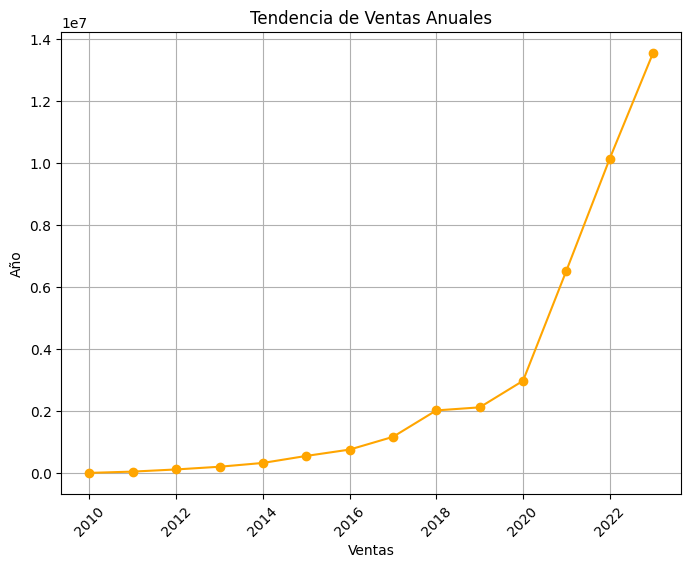

In [65]:
vn = ventas_por_anio(ventas_filtradas)
ventas_anuales = pd.Series(vn).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
ventas_anuales.plot(kind='line', marker='o', linestyle='-', color='orange')
plt.title('Tendencia de Ventas Anuales')
plt.xlabel('Ventas')
plt.ylabel('Año')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Grafico de Barras
Se muestran las ventas discriminadas por pais:

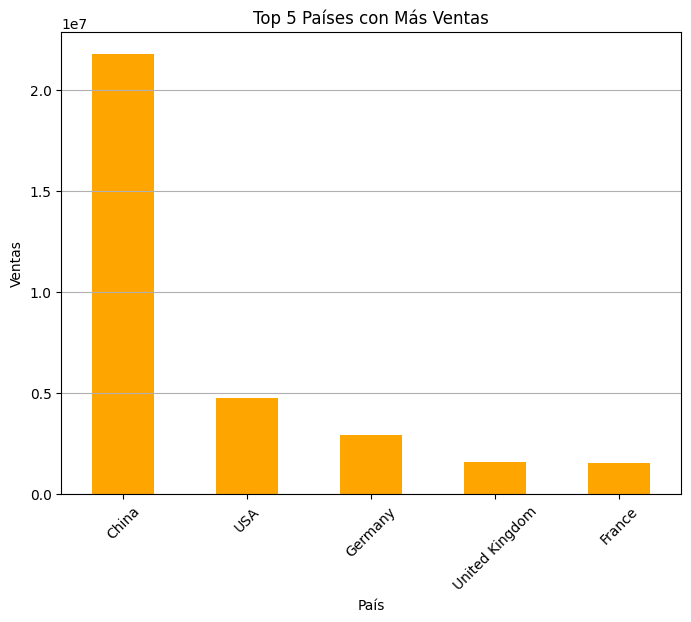

In [75]:
top = top_paises(ventas_filtradas)
paises_top = pd.Series(dict(top)).sort_values(ascending=False)
plt.figure(figsize=(8,6))
paises_top.plot(kind='bar', color='orange')
plt.title('Top 5 Países con Más Ventas')
plt.xlabel('País')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Grafico Pastel

Se comparan los tipos de PowerTrain

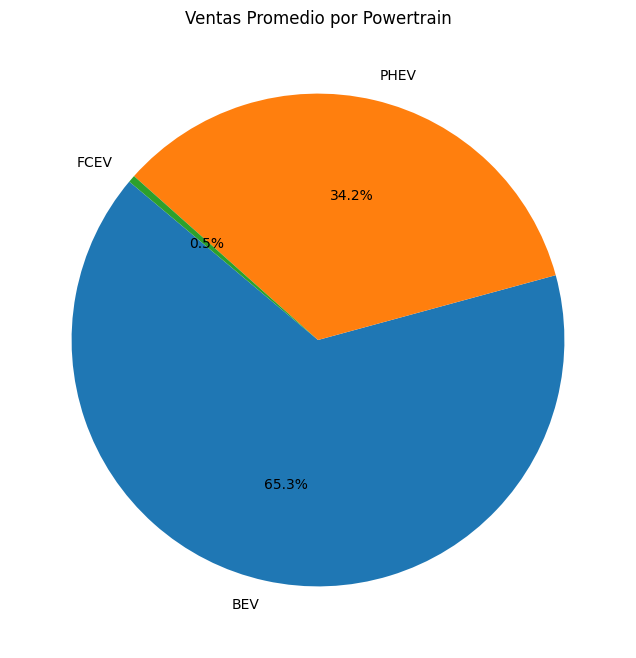

In [76]:
ventas_powertrain = ventas_promedio_por_powertrain(ventas_filtradas)  
pt = pd.Series(ventas_powertrain)

plt.figure(figsize=(8,8))
pt.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Ventas Promedio por Powertrain')
plt.ylabel('')
plt.show()
